In [1]:
import pandas as pd
import numpy as np

# Le chemin est "relatif" : on remonte d'un dossier (../) pour aller dans data/raw
df = pd.read_csv('../data/raw/credit_card_default.csv', header=1) # L'option header=1 ignore la première ligne qui est redondante dans ce fichier

In [2]:
df = df.rename(columns={'default payment next month': 'TARGET'})

In [3]:
# Affiche les types de colonnes et les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [4]:
# Affiche les 5 premières lignes du tableau
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Affiche les statistiques de base (moyenne, min, max...) pour les colonnes numériques
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


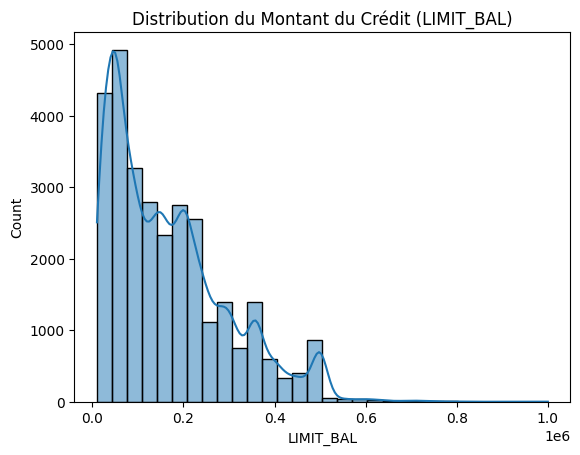

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution du montant du crédit accordé
sns.histplot(data=df, x='LIMIT_BAL', bins=30, kde=True)
plt.title('Distribution du Montant du Crédit (LIMIT_BAL)')
plt.show()

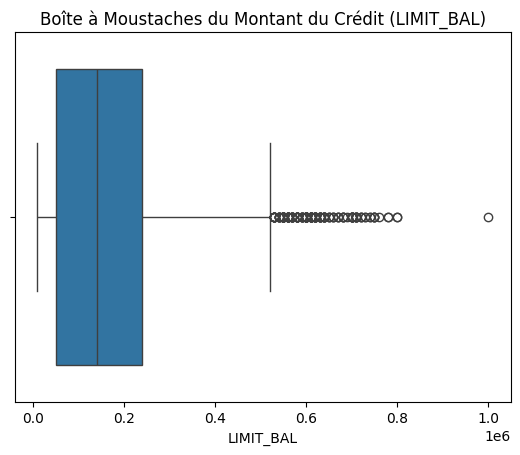

In [7]:
sns.boxplot(data=df, x='LIMIT_BAL')
plt.title('Boîte à Moustaches du Montant du Crédit (LIMIT_BAL)')
plt.show()

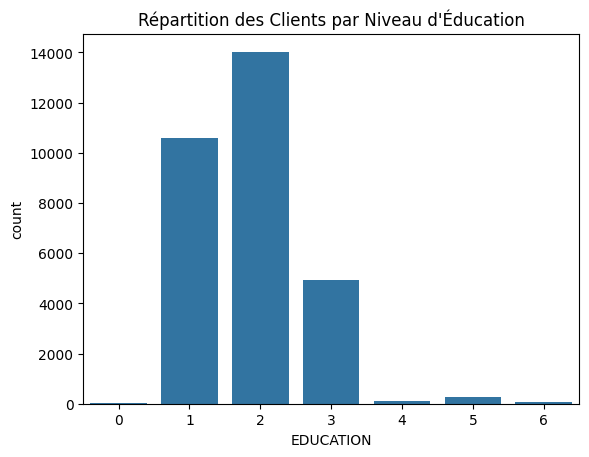

In [8]:
# Répartition par niveau d'éducation
sns.countplot(data=df, x='EDUCATION')
plt.title('Répartition des Clients par Niveau d\'Éducation')
plt.show()

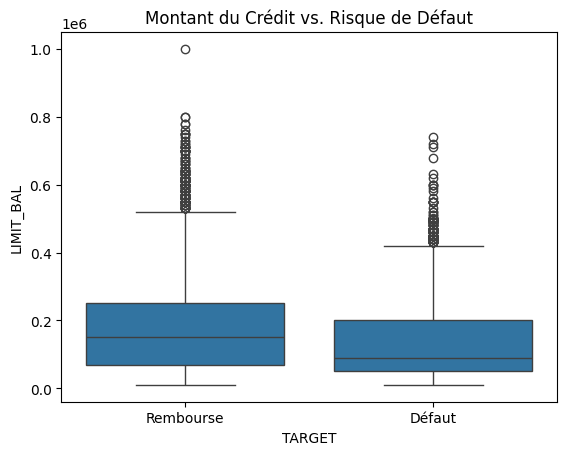

In [9]:
# Comparaison de LIMIT_BAL pour les deux groupes de TARGET
sns.boxplot(data=df, x='TARGET', y='LIMIT_BAL')
plt.title('Montant du Crédit vs. Risque de Défaut')
plt.xticks([0, 1], ['Rembourse', 'Défaut']) # Rendre les étiquettes plus claires
plt.show()

Observation : La médiane et les quartiles de la distribution de LIMIT_BAL sont visiblement plus bas pour les clients qui font défaut (TARGET=1).
Hypothèse : Les clients avec des limites de crédit plus faibles sont plus susceptibles de faire défaut. Cette variable semble être un bon prédicteur.

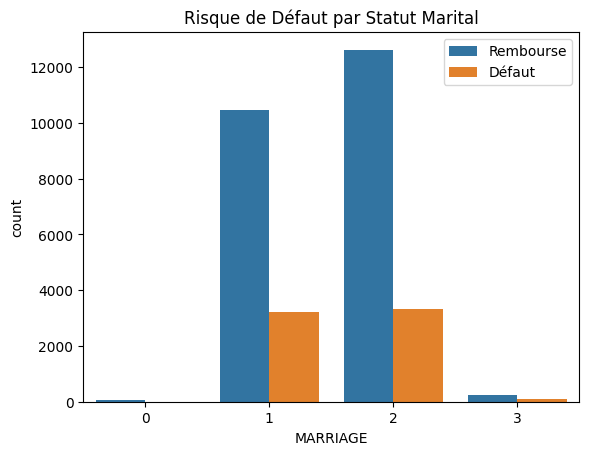

In [10]:
# Comparaison du risque de défaut par statut marital
sns.countplot(data=df, x='MARRIAGE', hue='TARGET')
plt.title('Risque de Défaut par Statut Marital')
plt.legend(['Rembourse', 'Défaut'])
plt.show()

0 : Inconnu/Non précisé / 1 : Marié(e) / 2 : Célibataire / 3 : Autre (divorcé, veuf, etc.)
Observation : La proportion de personnes mariés ne remboursant pas leur prêt est légèrement supérieur à celui des célibataires
Hypothèse : Les clients mariés sont plus susceptibles de faire défaut. Cette variable semble être un bon prédicteur.

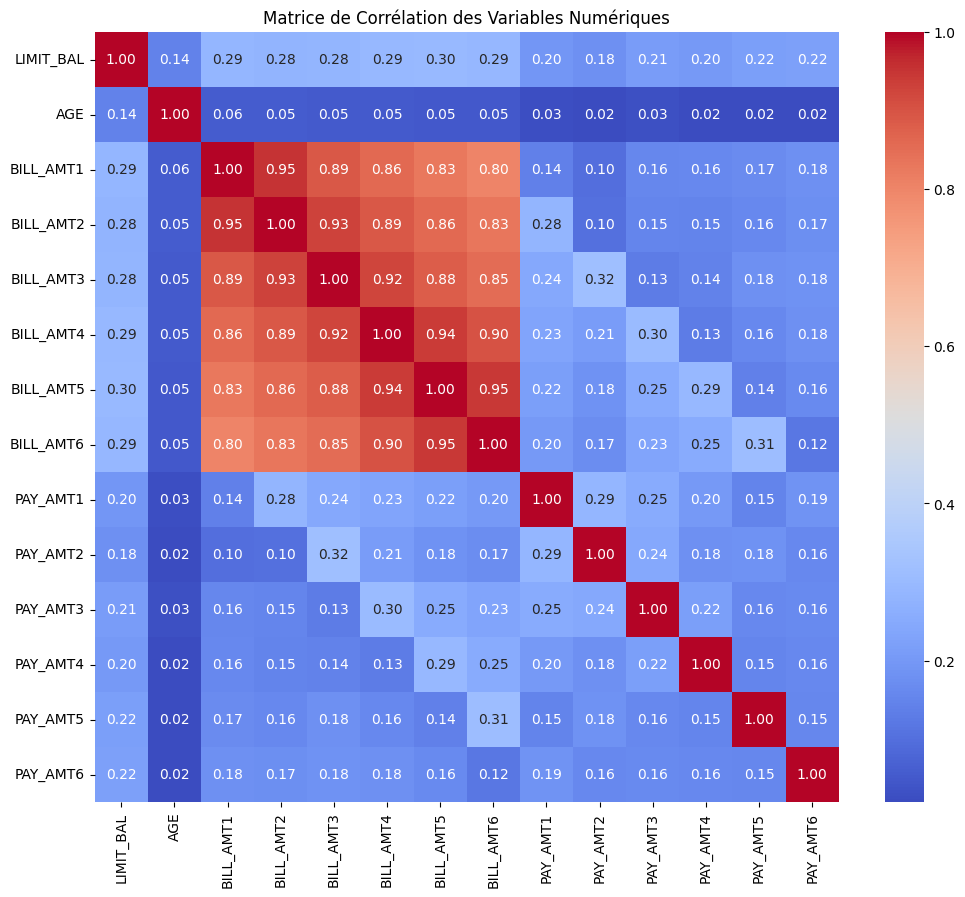

In [11]:
# On ne sélectionne que les colonnes numériques pertinentes
colonnes_numeriques = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

correlation_matrix = df[colonnes_numeriques].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

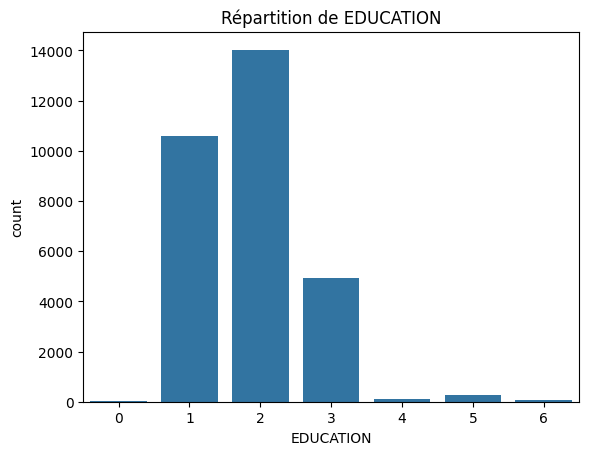

In [12]:
# Pour EDUCATION
sns.countplot(data=df, x='EDUCATION')
plt.title('Répartition de EDUCATION')
plt.show()

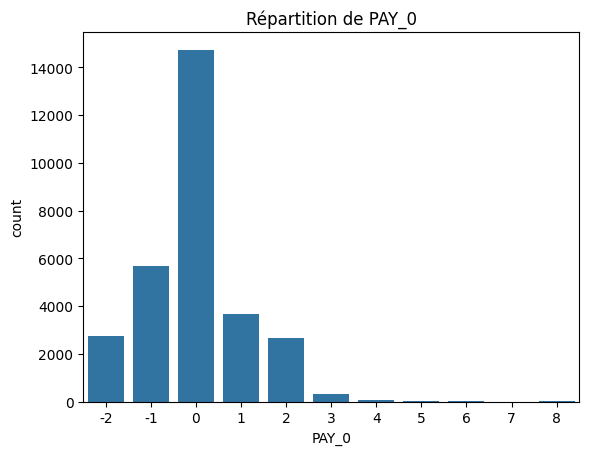

In [13]:
# Pour PAY_0 à PAY_6 (exemple avec PAY_0)
sns.countplot(data=df, x='PAY_0')
plt.title('Répartition de PAY_0')
plt.show()

Conclusion
Les variables EDUCATION, MARRIAGE et PAY_X sont de nature catégorielle ordinale. Elles nécessiteront un traitement spécifique (comme le one-hot encoding ou un encodage ordinal) avant d’être utilisées dans un modèle.
La forte nature ordinale des statuts de paiement (PAY_X) suggère qu’ils seront des prédicteurs très importants.

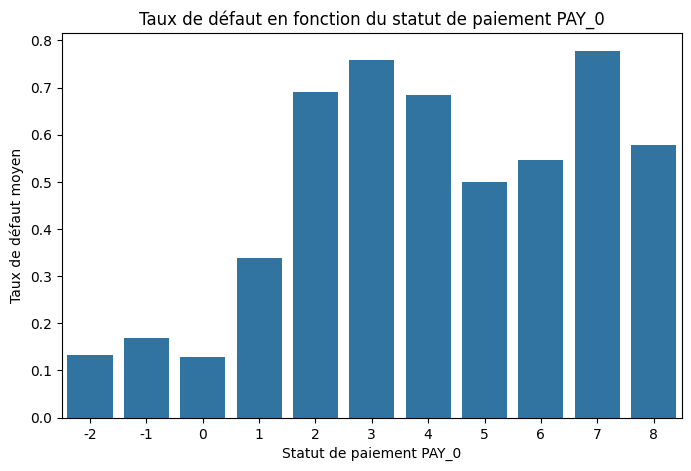

In [14]:
# Calcul du taux de défaut pour chaque statut de paiement PAY_0
pay0_default_rate = df.groupby('PAY_0')['TARGET'].mean().reset_index()

# Affichage du taux de défaut par statut de paiement
plt.figure(figsize=(8,5))
sns.barplot(data=pay0_default_rate, x='PAY_0', y='TARGET')
plt.xlabel('Statut de paiement PAY_0')
plt.ylabel('Taux de défaut moyen')
plt.title('Taux de défaut en fonction du statut de paiement PAY_0')
plt.show()

Observation : La proportion de personnes à défaut est beaucoup plus important chez ceux qui règle leur payement 2 mois ou plus en retard.
Hypothèse : Un simple retard de paiement d'un ou deux mois augmente drastiquement le risque de défaut.